In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import numpy as np



In [2]:
data = pd.read_csv('purchase_cars.csv')
del data['stock_number']
del data['expected_sales_price']
data

,brand,model,sub_type,horse_power,gear_type,fuel_type,mileage,build_year,co2_emission,sold_price
0,Honda,Civic,2.0 VTEC,320,Manual,Benzin,47079,2017,176.0,34299.0
1,Dacia,Duster II,1.2 TCe,125,Manual,Benzin,2614,2018,138.0,15999.0
2,Nissan,Qashqai,DIGT,140,Manual,Benzin,54581,2019,130.0,20199.0
3,Seat,Ibiza,1.0 SC 75cv,75,Manual,Benzin,19188,2016,118.0,10199.0
4,Jeep,Renegade,1.0G 88kw 120cv,120,Manual,Benzin,17672,2020,145.0,21399.0
...,...,...,...,...,...,...,...,...,...,...
7665,Opel,Insignia,1.6 CDTI DPF,120,Manual,Diesel,95027,2016,104.0,12599.0
7666,Mitsubishi,Outlander,2.2 DI-D,150,Manual,Diesel,55640,2016,139.0,22999.0
7667,Audi,Q2,30 TFSI 85kw 116cv,116,Automatic,Benzin,79233,2018,122.0,23399.0
7668,Peugeot,308,1.6 Blue-HDi,120,Manual,Diesel,138528,2015,94.0,11499.0


In [3]:
data['gear_type'].unique()
data.replace({'gear_type':{'Duplex':'Automatic','Semi-Automatic':'Automatic'}},inplace=True)
data.dropna(inplace=True)
data['build_year'] = data['build_year'].astype(int)
data['mileage'] = data['mileage'].astype(int)
data['co2_emission'] = data['co2_emission'].astype(int)
data['sold_price'] = data['sold_price'].astype(int)
data  = data.reset_index(drop=True)


In [4]:
data['build_year'] = data['build_year'].astype(int)
data['mileage'] = data['mileage'].astype(int)
data['co2_emission'] = data['co2_emission'].astype(int)
data['sold_price'] = data['sold_price'].astype(int)
data  = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7653 entries, 0 to 7652
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         7653 non-null   object
 1   model         7653 non-null   object
 2   sub_type      7653 non-null   object
 3   horse_power   7653 non-null   int64 
 4   gear_type     7653 non-null   object
 5   fuel_type     7653 non-null   object
 6   mileage       7653 non-null   int32 
 7   build_year    7653 non-null   int32 
 8   co2_emission  7653 non-null   int32 
 9   sold_price    7653 non-null   int32 
dtypes: int32(4), int64(1), object(5)
memory usage: 478.4+ KB


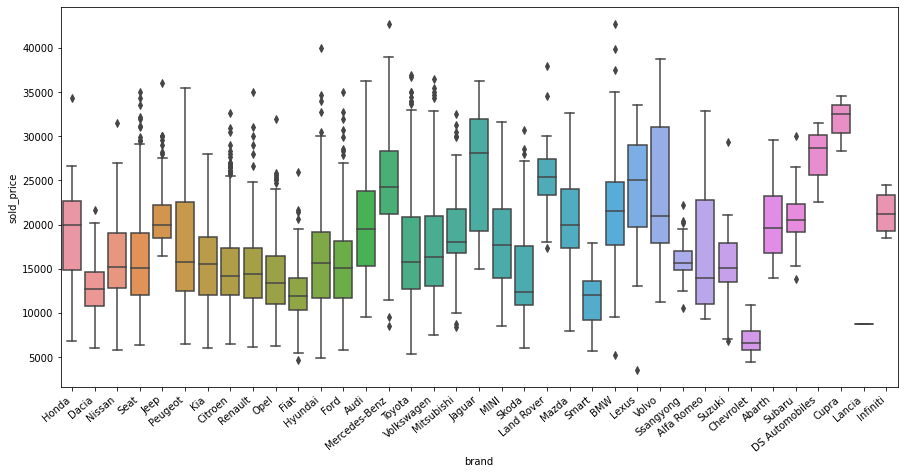

In [5]:
import seaborn as sns

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='sold_price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

c:\Users\Bestia 2.0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bestia 2.0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bestia 2.0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bestia 2.0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  war

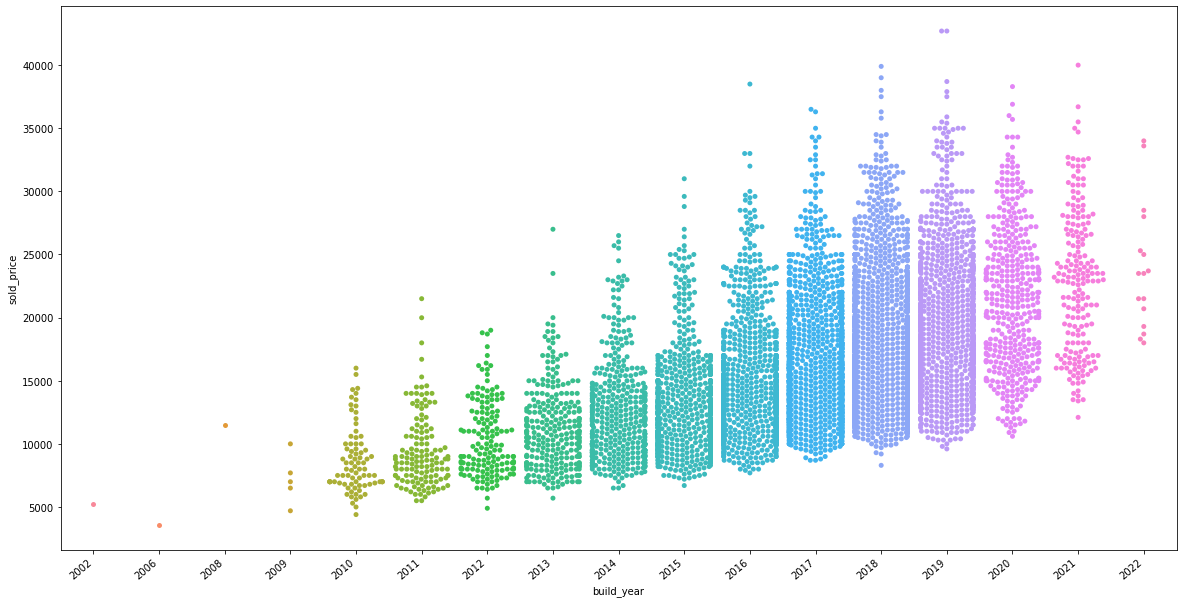

In [6]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='build_year',y='sold_price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

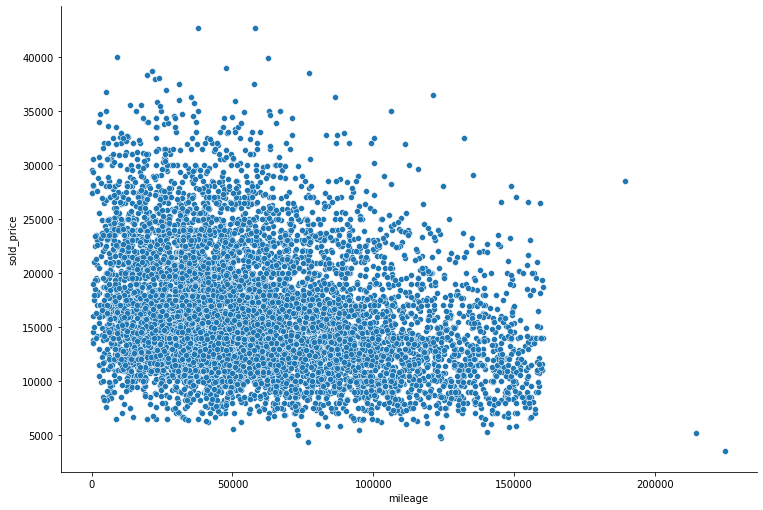

In [7]:
sns.relplot(x='mileage',y='sold_price',data=data,height=7,aspect=1.5)

c:\Users\Bestia 2.0\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


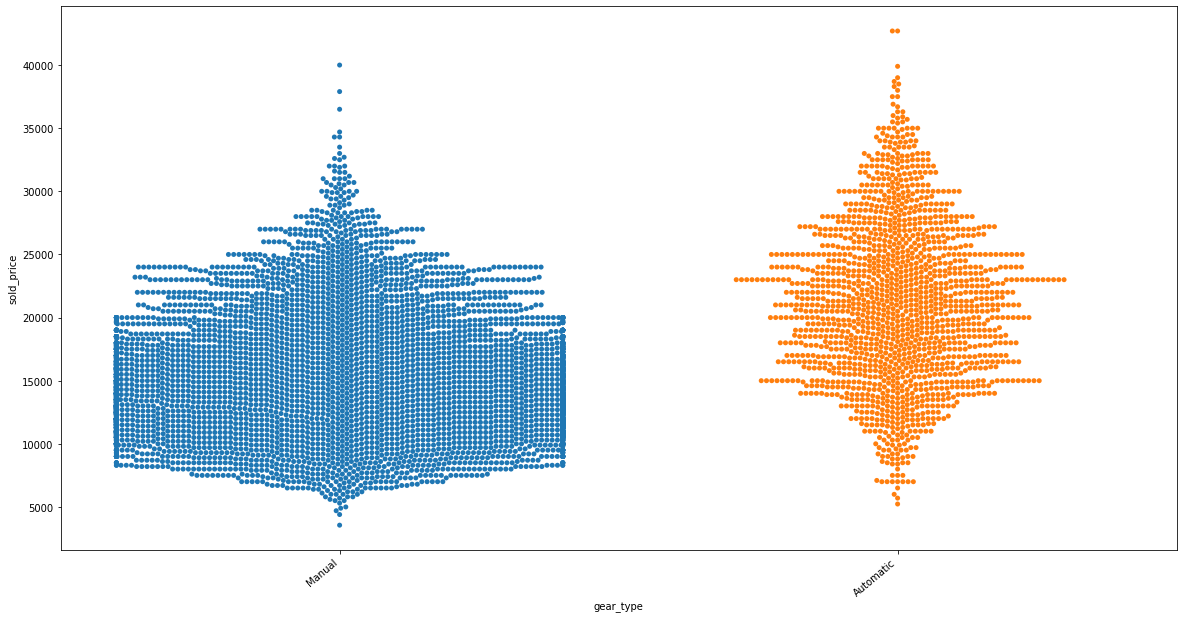

In [8]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='gear_type',y='sold_price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [9]:
X= data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
ohe=OneHotEncoder()
ohe.fit(X[['brand','model','sub_type','gear_type','fuel_type']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['brand','model','sub_type','gear_type','fuel_type']),
                                    remainder='passthrough')
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen',
       'Cupra', 'DS Automobiles', 'Dacia', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lancia',
       'Land Rover', 'Lexus', 'MINI', 'Mazda', 'Mercedes-...
       'i20', 'i20 Active', 'i30', 'i30 Fastback', 'i40', 'iQ', 'ix20',
       'ix35', "pro_cee'd", 'up!'], dtype=object),
                                                                            array([' 1.5 EcoBoost  88kw 120cv', ' 2.0 CDTI ecoFlex', ' 2.5 Hybrid',
       ..., 'xDrive 25i', 'xDrive 30d', 'xDrive20d'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                 

In [11]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['brand','model','sub_type','gear_type','fuel_type']),
                                    remainder='passthrough')

column_trans                             

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen',
       'Cupra', 'DS Automobiles', 'Dacia', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lancia',
       'Land Rover', 'Lexus', 'MINI', 'Mazda', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'P...
       'i20', 'i20 Active', 'i30', 'i30 Fastback', 'i40', 'iQ', 'ix20',
       'ix35', "pro_cee'd", 'up!'], dtype=object),
                                                           array([' 1.5 EcoBoost  88kw 120cv', ' 2.0 CDTI ecoFlex', ' 2.5 Hybrid',
       ..., 'xDrive 25i', 'xDrive 30d', 'xDrive20d'], dtype=object),
                                                           array(['Automatic', 'Manual'], dtype=object),
                                                           array(['Benzin', 'Diesel', 'Other'], dtype=object

In [12]:
lr=LinearRegression()

In [13]:
pipe=make_pipeline(column_trans,lr)

In [14]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen',
       'Cupra', 'DS Automobiles', 'Dacia', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lancia',
       'Land Rover', 'Lexus', 'MINI', 'Mazda', 'Mercedes-...
       'i20', 'i20 Active', 'i30', 'i30 Fastback', 'i40', 'iQ', 'ix20',
       'ix35', "pro_cee'd", 'up!'], dtype=object),
                                                                            array([' 1.5 EcoBoost  88kw 120cv', ' 2.0 CDTI ecoFlex', ' 2.5 Hybrid',
       ..., 'xDrive 25i', 'xDrive 30d', 'xDrive20d'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                 

In [15]:
y_pred=pipe.predict(X_test)

In [16]:
r2_score(y_test,y_pred)

0.9146118401800988

In [17]:
data.describe()

,horse_power,mileage,build_year,co2_emission,sold_price
count,7653.000000,7653.000000,7653.000000,7653.000000,7653.000000
mean,116.143212,59154.532994,2016.901999,117.293872,16461.781001
std,32.635121,36516.910881,2.265462,21.829706,5677.580811
min,60.000000,254.000000,2002.000000,0.000000,3556.000000
25%,90.000000,31033.000000,2016.000000,105.000000,12299.000000
50%,115.000000,52011.000000,2017.000000,115.000000,15499.000000
75%,132.000000,82467.000000,2018.000000,127.000000,19899.000000
max,320.000000,224758.000000,2022.000000,950.000000,42699.000000


In [18]:
corr_matrix = data.corr(method='pearson')
corr_matrix

,horse_power,mileage,build_year,co2_emission,sold_price
horse_power,1.000000,0.087006,0.091992,0.388219,0.680105
mileage,0.087006,1.000000,-0.590436,-0.049130,-0.285839
build_year,0.091992,-0.590436,1.000000,-0.018211,0.555572
co2_emission,0.388219,-0.049130,-0.018211,1.000000,0.212564
sold_price,0.680105,-0.285839,0.555572,0.212564,1.000000


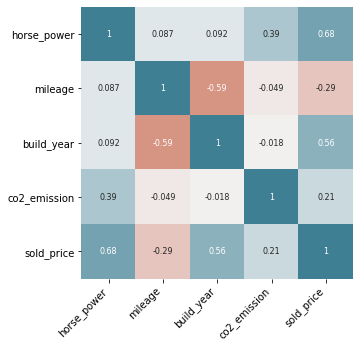

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [20]:
scores=[]
for i in range(1500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)
scores[np.argmax(scores)]

0.9407423965043091

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai', 'i30','1.4',110,'Manual','Benzin',110000,2015,'101']).reshape(1,9)))

array([10554.06548535])

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
columnsToEncode = list(data.select_dtypes(include=['category','object']))
columnsToEncode
for feature in columnsToEncode:
    data[feature] = le.fit_transform(data[feature])
